In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np                         # For numerical operations and arrays
import pandas as pd                        # For handling CSV dataset and preprocessing
import matplotlib.pyplot as plt            # For plotting graphs

In [4]:
df = pd.read_csv("/content/drive/MyDrive/NIELIT/Housing.csv")            # Read dataset from CSV file
df = df[['area', 'price']].dropna().copy() # Keep only 'area' and 'price', drop missing values

In [5]:
# Extract features and target
X_raw = df[['area']].values.astype(float)  # Convert 'area' column to numpy array (shape = (n_samples,1))
y = df['price'].values.astype(float)       # Convert 'price' column to numpy array (shape = (n_samples,))

In [6]:
x_mean = X_raw.mean()                      # Compute mean of 'area'
x_std = X_raw.std() if X_raw.std() != 0 else 1.0   # Compute standard deviation (avoid division by 0)
X = (X_raw - x_mean) / x_std               # Apply standardization: (x - mean) / std

In [7]:
def batch_gradient_descent(X, y_true, epochs=10, learning_rate=0.01, verbose=True):
    n_samples, n_features = X.shape        # Get number of samples and number of features
    w = np.zeros(n_features)               # Initialize weights (coefficients) with 0
    b = 0.0                                # Initialize bias (intercept) with 0

    # Lists to store metrics per epoch
    mse_list = []                          # Store Mean Squared Error values
    r2_list = []                           # Store R² Score values
    epoch_list = []                        # Store epoch numbers

    y_mean = y_true.mean()                 # Mean of target values
    ss_tot = np.sum((y_true - y_mean) ** 2)  # Total Sum of Squares (constant for R²)

    # Loop over number of epochs
    for i in range(1, epochs + 1):
        y_pred = X.dot(w) + b              # Prediction: y = w*x + b
        error = y_pred - y_true            # Difference between predicted and actual

        # Compute gradients for weight and bias (derivatives of MSE loss)
        grad_w = (2.0 / n_samples) * (X.T.dot(error))   # Gradient wrt weights
        grad_b = (2.0 / n_samples) * np.sum(error)      # Gradient wrt bias

        # Update parameters using gradient descent rule
        w -= learning_rate * grad_w         # Update weight(s)
        b -= learning_rate * grad_b         # Update bias

        # Compute metrics
        mse = np.mean(error ** 2)           # Mean Squared Error
        ss_res = np.sum((y_true - y_pred) ** 2)  # Residual Sum of Squares
        r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0.0  # R² Score (accuracy measure)

        # Save metrics
        mse_list.append(mse)                # Add current epoch's MSE to list
        r2_list.append(r2)                  # Add current epoch's R² to list
        epoch_list.append(i)                # Save epoch number

        # Print progress if verbose=True
        if verbose:
            print(f"Epoch {i:02d} | MSE: {mse:.2f} | R^2: {r2:.4f}")

    # Return learned weights, bias, and history of metrics
    return w, b, mse_list, r2_list, epoch_list

In [8]:
EPOCHS = 20                                # How many times to run gradient descent loop
LEARNING_RATE = 0.05                       # Step size for updating weights
w, b, mse_list, r2_list, epoch_list = batch_gradient_descent(
    X, y, epochs=EPOCHS, learning_rate=LEARNING_RATE, verbose=True
)

Epoch 01 | MSE: 26213832729318.53 | R^2: -6.5066
Epoch 02 | MSE: 21706088176402.34 | R^2: -5.2157
Epoch 03 | MSE: 18054815088540.21 | R^2: -4.1702
Epoch 04 | MSE: 15097283887371.90 | R^2: -3.3232
Epoch 05 | MSE: 12701683614425.56 | R^2: -2.6372
Epoch 06 | MSE: 10761247393339.03 | R^2: -2.0816
Epoch 07 | MSE: 9189494054258.94 | R^2: -1.6315
Epoch 08 | MSE: 7916373849604.07 | R^2: -1.2669
Epoch 09 | MSE: 6885146483833.62 | R^2: -0.9716
Epoch 10 | MSE: 6049852317559.56 | R^2: -0.7324
Epoch 11 | MSE: 5373264042877.57 | R^2: -0.5387
Epoch 12 | MSE: 4825227540385.16 | R^2: -0.3817
Epoch 13 | MSE: 4381317973366.30 | R^2: -0.2546
Epoch 14 | MSE: 4021751224081.03 | R^2: -0.1517
Epoch 15 | MSE: 3730502157159.96 | R^2: -0.0683
Epoch 16 | MSE: 3494590412953.89 | R^2: -0.0007
Epoch 17 | MSE: 3303501900146.98 | R^2: 0.0540
Epoch 18 | MSE: 3148720204773.37 | R^2: 0.0983
Epoch 19 | MSE: 3023347031520.76 | R^2: 0.1342
Epoch 20 | MSE: 2921794761186.14 | R^2: 0.1633


In [9]:
# Convert learned parameters back to original 'area' units (optional but useful)
# Because we trained on standardized values, we rescale to original units:
# y = (w/std)*x + (b - w*mean/std)
w_orig = w[0] / x_std                      # Slope in terms of original 'area' units
b_orig = b - (w[0] * x_mean / x_std)       # Intercept in original scale

In [12]:
# Print learned parameters (both standardized and original scale)
print("\nLearned Parameters (standardized feature):")
print(f"  w (slope on standardized area): {w[0]:.6f}")   # Weight on standardized feature
print(f"  b (intercept on standardized area): {b:.6f}")  # Bias on standardized feature

print("\nLearned Parameters (original feature scale):")
print(f"  Slope (price per square ft): {w_orig:.6f}")    # Rescaled slope
print(f"  Intercept: {b_orig:.2f}")                      # Rescaled intercept


Learned Parameters (standardized feature):
  w (slope on standardized area): 879855.593481
  b (intercept on standardized area): 4187206.252431

Learned Parameters (original feature scale):
  Slope (price per square ft): 405.809532
  Intercept: 2097067.50


In [13]:
y_pred_train = (X.dot(w) + b)              # Predicted prices for training data (standardized X)

Saved: epoch_vs_accuracy.png


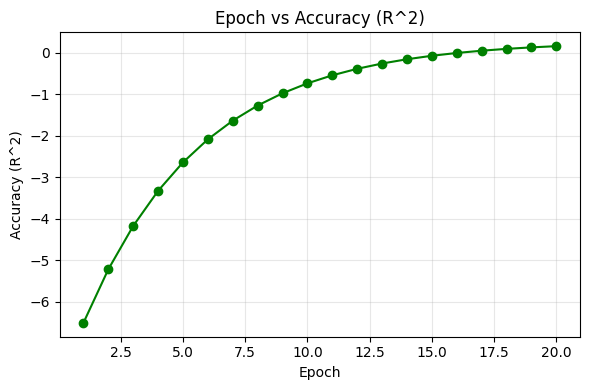

In [14]:
plt.figure(figsize=(6,4))                  # Create figure with given size
plt.plot(epoch_list, r2_list,              # Plot epoch vs R²
         marker='o', color='green')
plt.xlabel("Epoch")                        # Label x-axis
plt.ylabel("Accuracy (R^2)")               # Label y-axis
plt.title("Epoch vs Accuracy (R^2)")       # Title of graph
plt.grid(True, alpha=0.3)                  # Light grid lines
plt.tight_layout()                         # Adjust spacing to fit labels
plt.savefig("epoch_vs_accuracy.png", dpi=150, bbox_inches='tight') # Save plot as PNG
print("Saved: epoch_vs_accuracy.png")      # Confirmation message
plt.show()

Saved: epoch_vs_loss.png


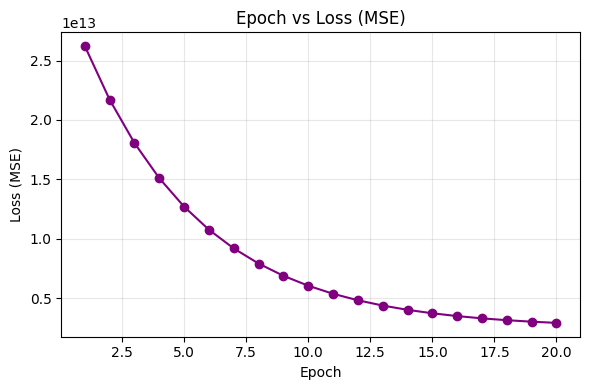

In [15]:
plt.figure(figsize=(6,4))                  # Create new figure
plt.plot(epoch_list, mse_list,             # Plot epoch vs MSE
         marker='o', color='purple')
plt.xlabel("Epoch")                        # Label x-axis
plt.ylabel("Loss (MSE)")                   # Label y-axis
plt.title("Epoch vs Loss (MSE)")           # Title of graph
plt.grid(True, alpha=0.3)                  # Light grid lines
plt.tight_layout()                         # Adjust spacing
plt.savefig("epoch_vs_loss.png", dpi=150, bbox_inches='tight') # Save figure
print("Saved: epoch_vs_loss.png")          # Print confirmation
plt.show()                                 # Show plot

Saved: price_vs_area_regression.png


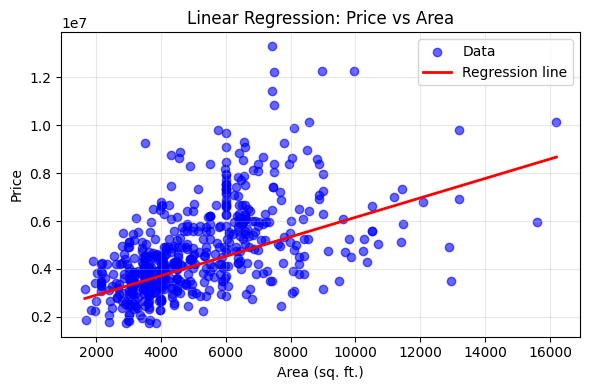

In [16]:
sort_idx = np.argsort(X_raw[:, 0])         # Sort indices of 'area'
X_sorted = X_raw[sort_idx]                 # Sorted 'area'
y_line = y_pred_train[sort_idx]            # Corresponding predicted values

plt.figure(figsize=(6,4))                  # Create figure
plt.scatter(X_raw, y,                      # Scatter plot of actual data (blue points)
            color="blue", alpha=0.6, label="Data")
plt.plot(X_sorted, y_line,                 # Plot regression line (red)
         color="red", linewidth=2, label="Regression line")
plt.xlabel("Area (sq. ft.)")               # Label x-axis
plt.ylabel("Price")                        # Label y-axis
plt.title("Linear Regression: Price vs Area") # Graph title
plt.legend()                               # Show legend
plt.grid(True, alpha=0.3)                  # Grid lines
plt.tight_layout()                         # Adjust spacing
plt.savefig("price_vs_area_regression.png", dpi=150, bbox_inches='tight') # Save plot
print("Saved: price_vs_area_regression.png") # Print confirmation
plt.show()                                 # Show final plot